# Problem 3: Implicit ODE solvers

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from TestProblems import *
from Solvers import *
from PlotFunctions import *

## Stability plot

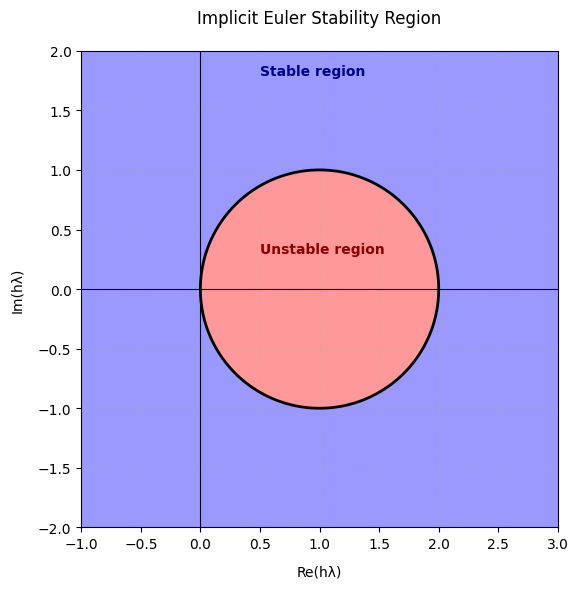

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create grid in the complex plane
x = np.linspace(-1, 3, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)
Z = X + 1j * Y

# Amplification factor for Implicit Euler: R(z) = 1/(1 - z)
R = 1 / (1 - Z)
R_mag = np.abs(R)

# Create figure
plt.figure(figsize=(7, 6))

# Plot stable (red) and unstable (blue) regions
plt.contourf(X, Y, R_mag <= 1, levels=[0, 0.5, 1.5], 
             colors=['red', 'blue'], alpha=0.4)

# Draw stability boundary (|R(z)| = 1)
plt.contour(X, Y, R_mag, levels=[1], colors='black', linewidths=2)



# Add axes and formatting
plt.axhline(0, color='black', lw=0.8)
plt.axvline(0, color='black', lw=0.8)
plt.title("Implicit Euler Stability Region", pad=20)
plt.xlabel("Re(hλ)", labelpad=10)
plt.ylabel("Im(hλ)", labelpad=10)
plt.gca().set_aspect('equal')

# Add legend and annotations (MATCHING YOUR UPDATED STYLE)
plt.text(0.5, 0.3, "Unstable region", color='darkred', weight='bold')  # Left half-plane is stable
plt.text(0.5, 1.8, "Stable region", color='darkblue', weight='bold')  # Right half-plane

plt.grid(True, linestyle=':', alpha=0.5)
plt.xlim(-1, 3)  # Slightly extended to show boundary
plt.ylim(-2, 2)
plt.tight_layout()
plt.show()

## Test on test problems

### Van der Pol

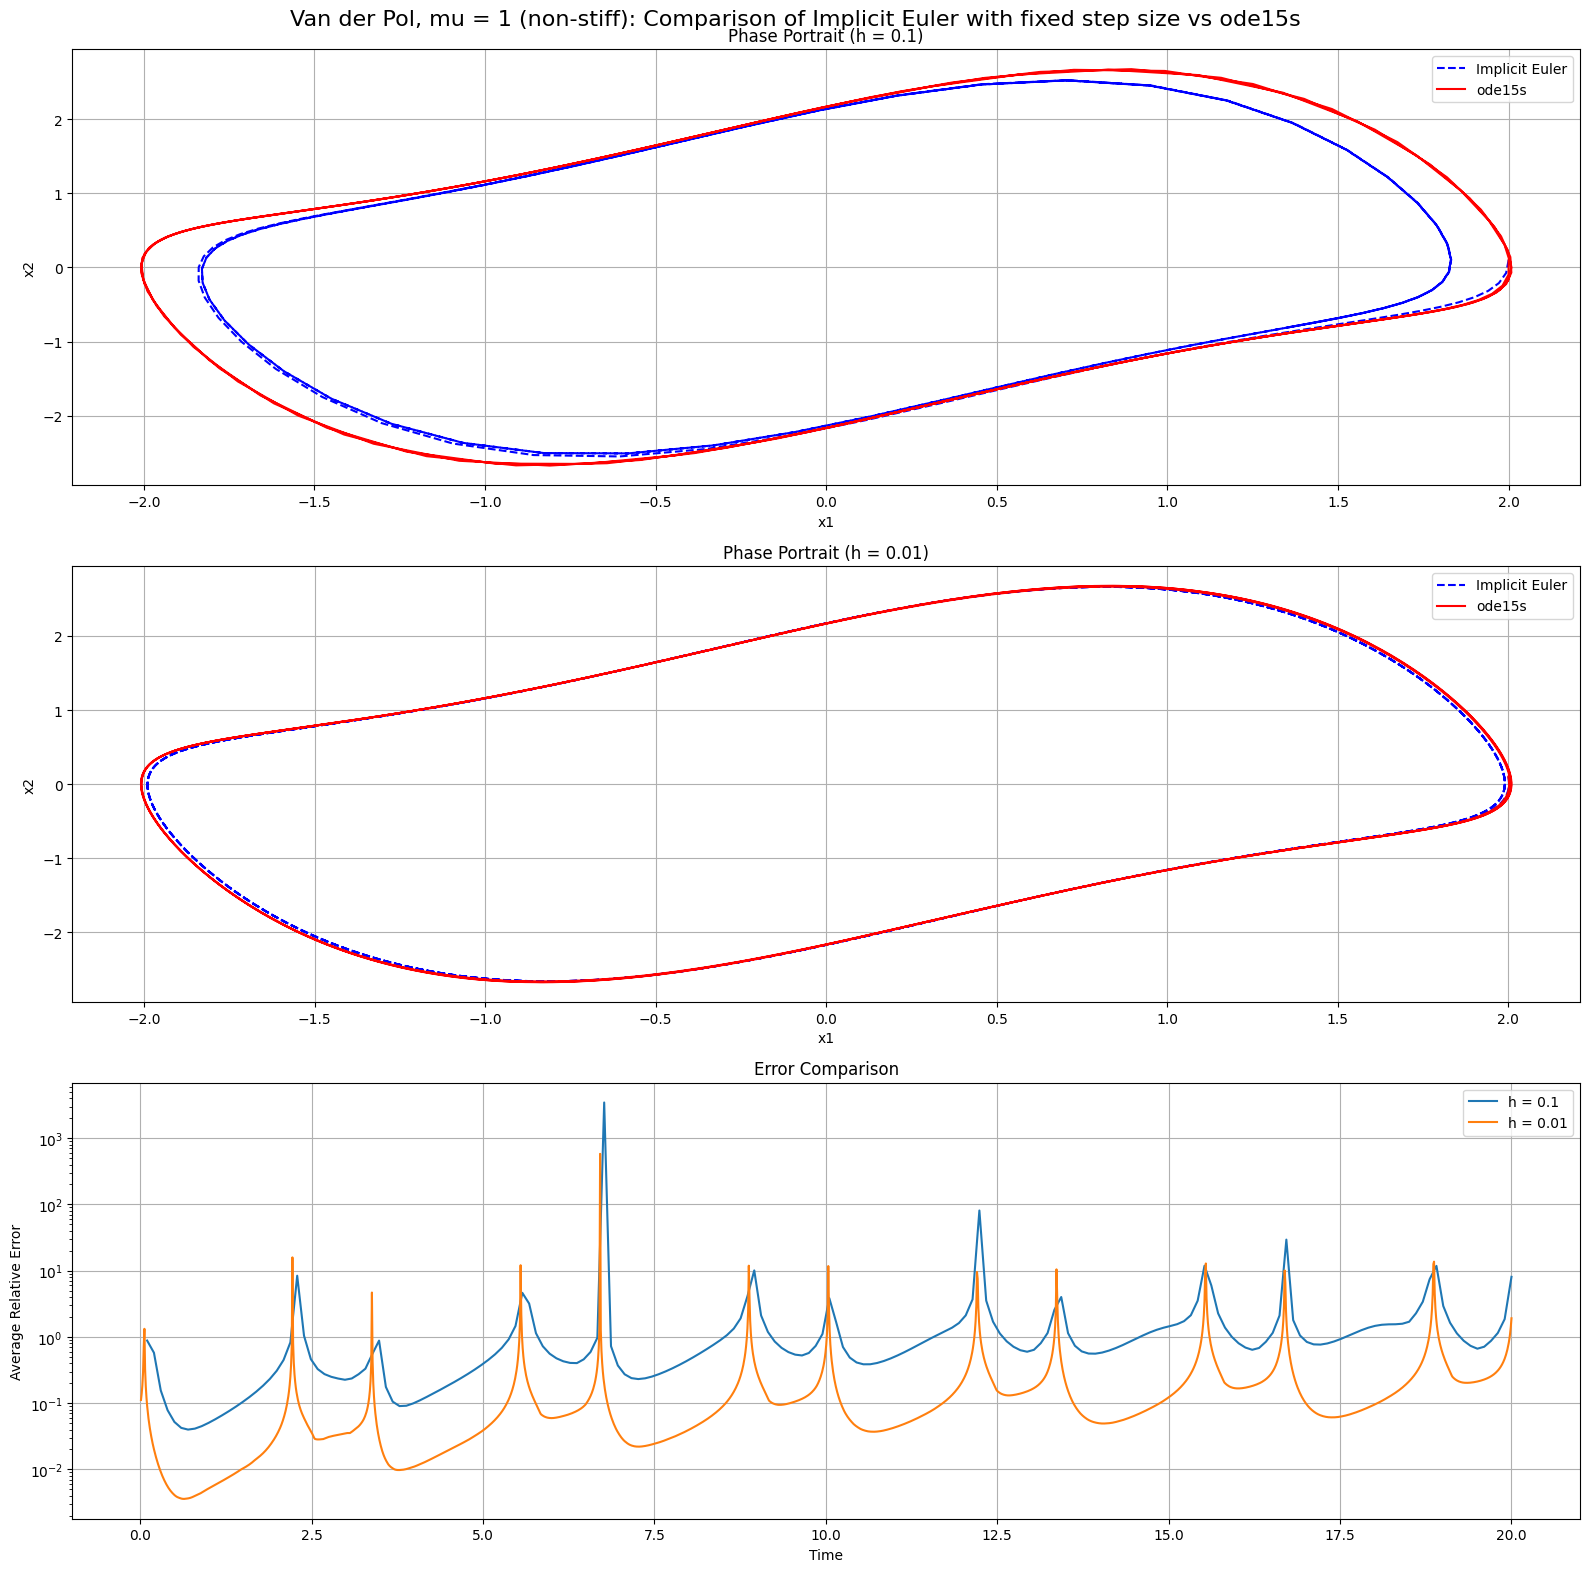

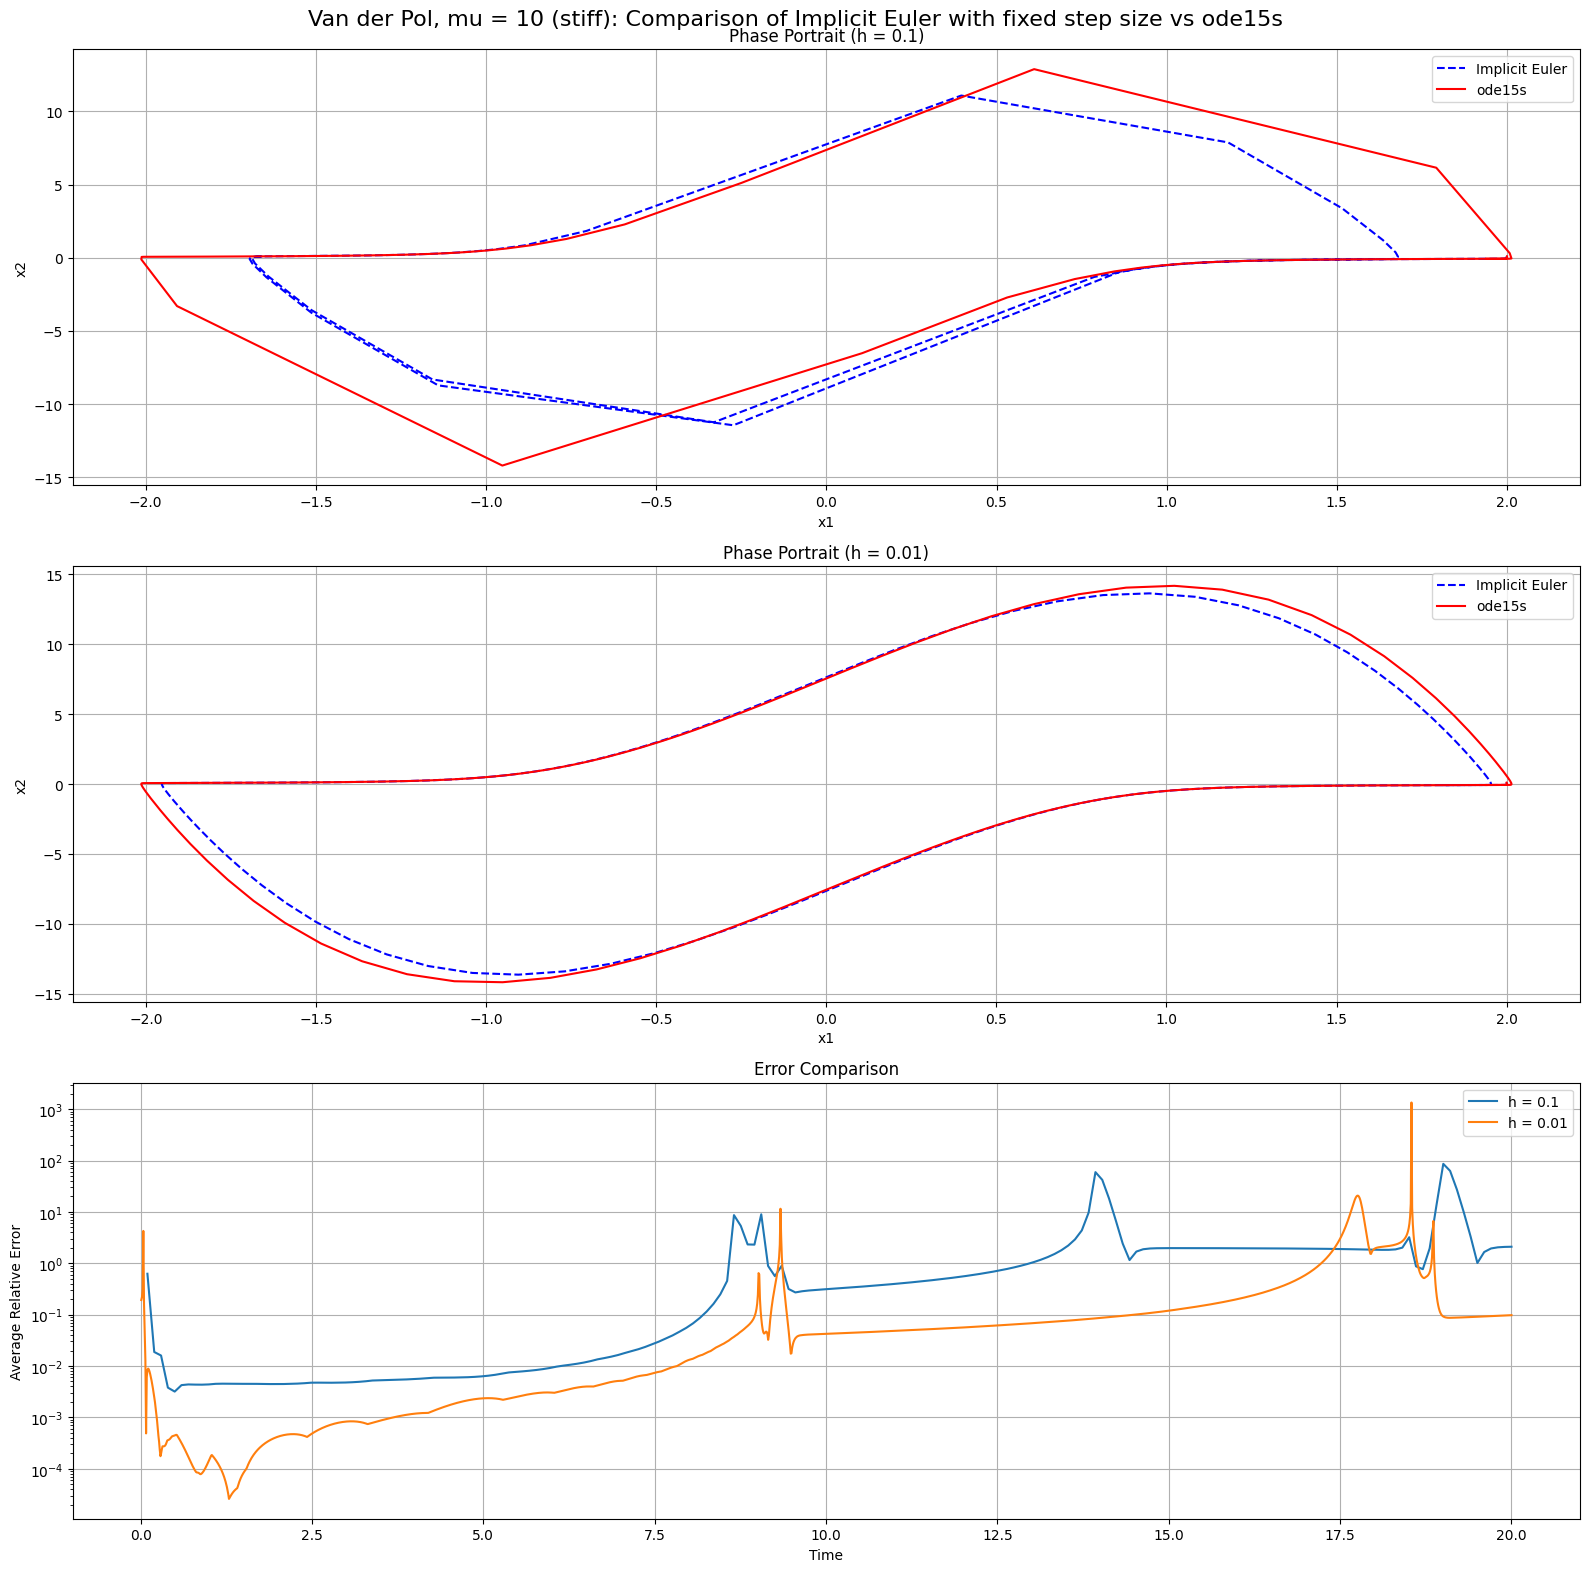

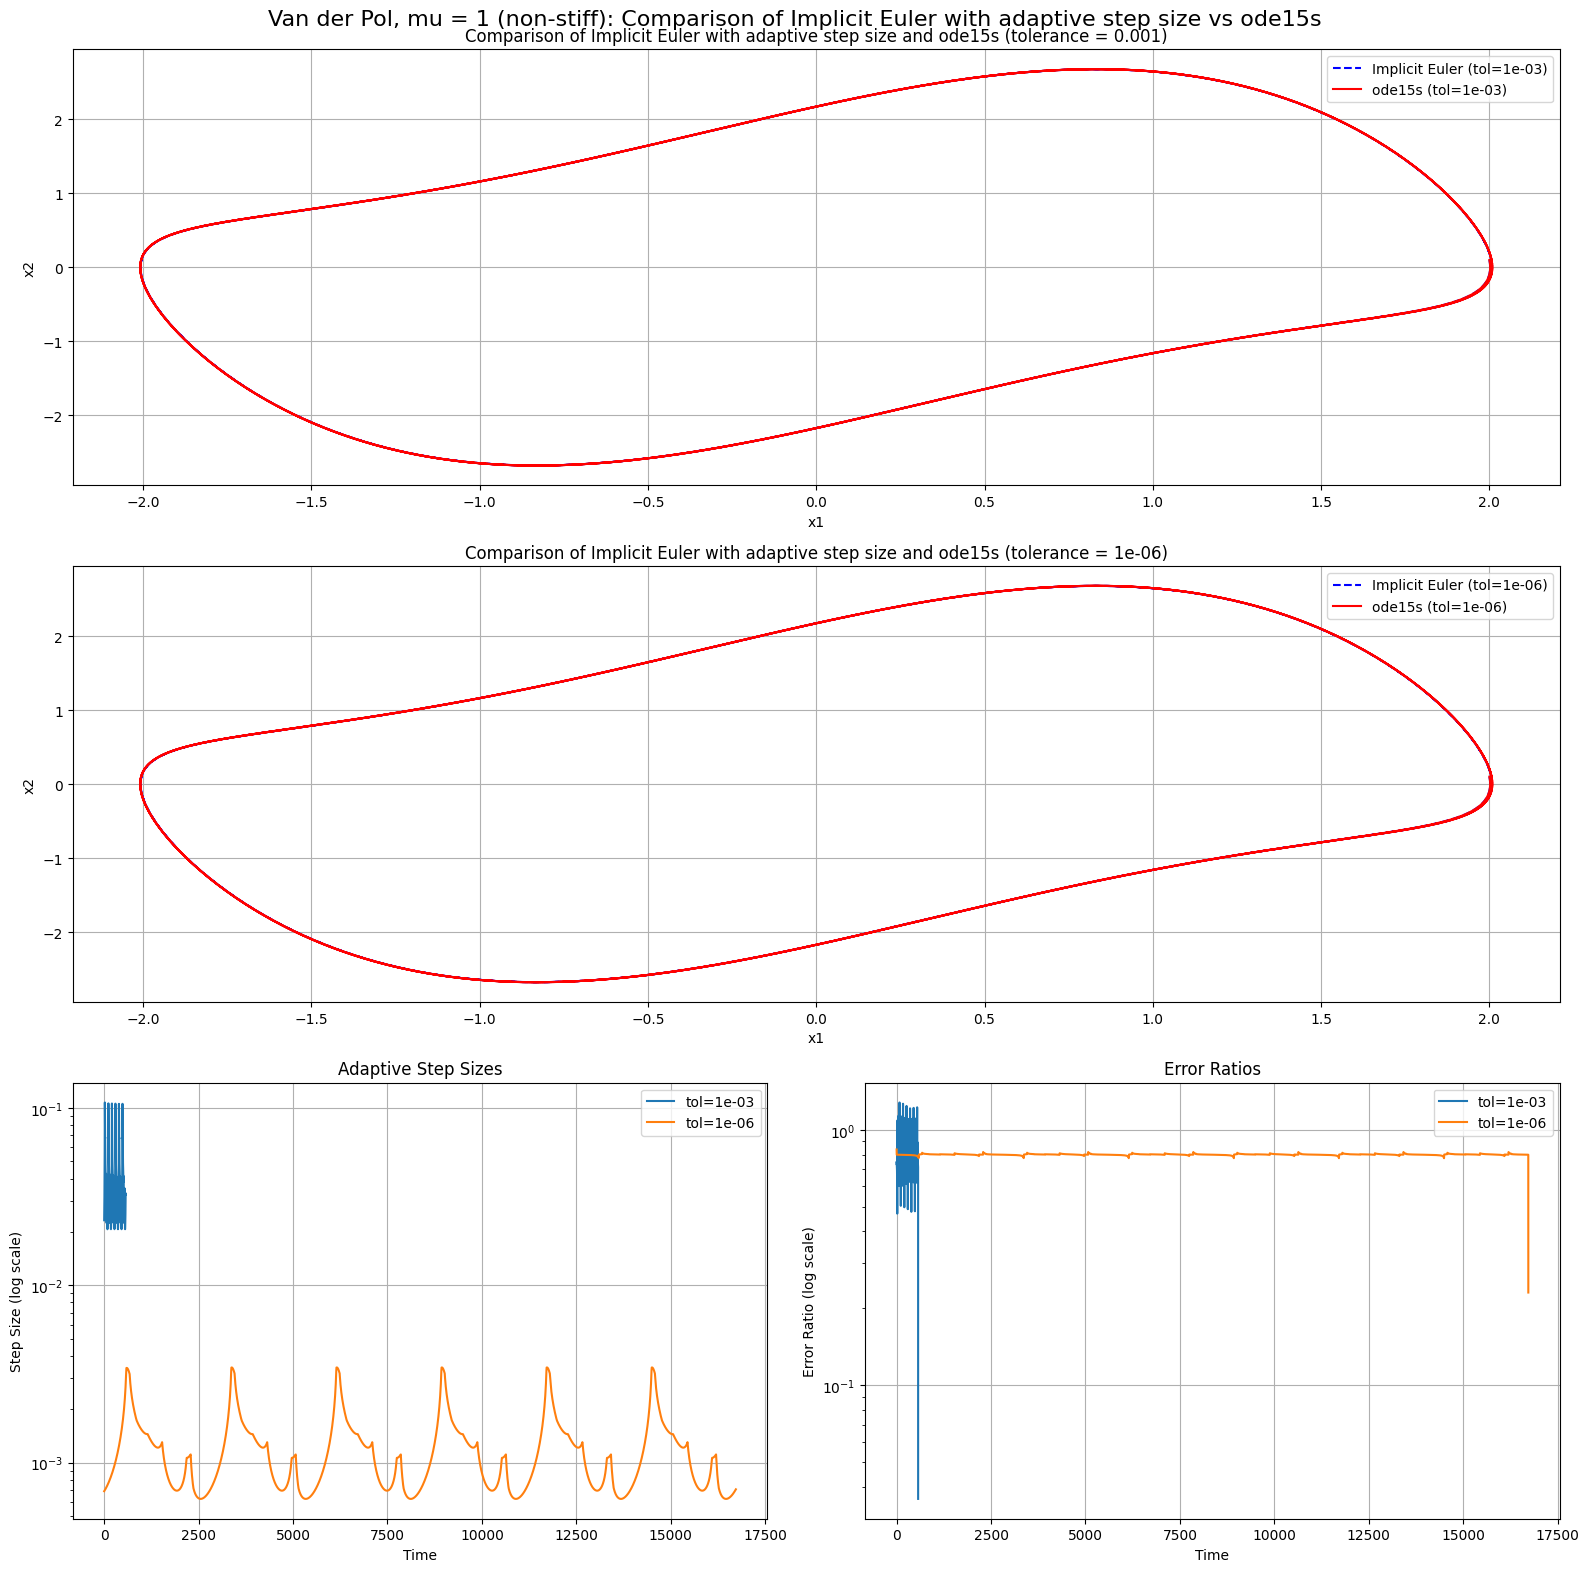

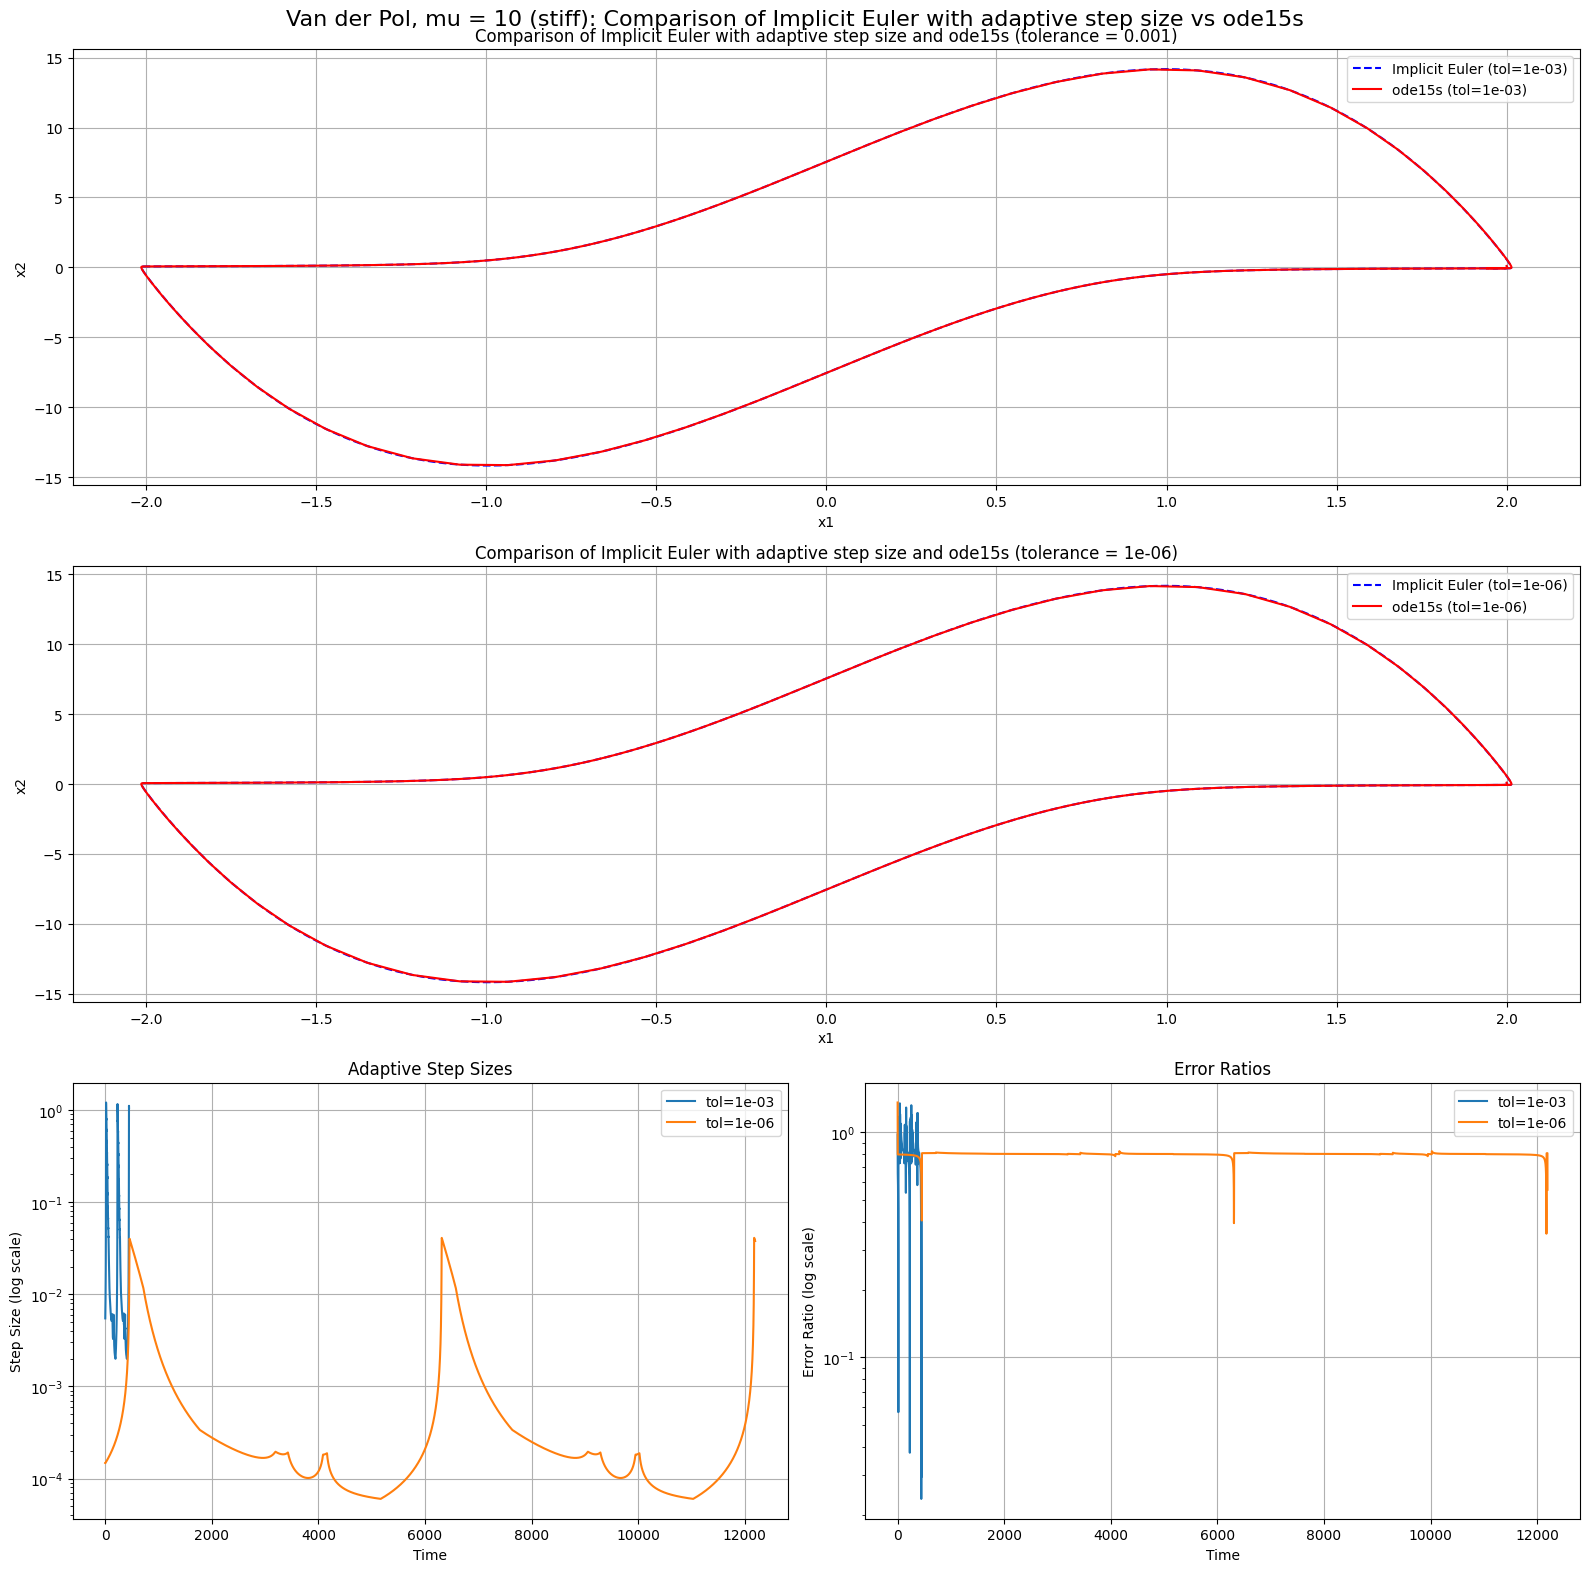

In [3]:
# Define time span and initial conditions
# Define time span and initial conditions
mu_nonstiff = 1  # Non-stiff
mu_stiff = 10  # Stiff
t_span = (0, 20)
x0 = np.array([2, 0.1])  # Initial condition

vp_imp_fixed_nonstiff = compare_solvers(van_der_pol_model, t_span, x0, params = [mu_nonstiff], model_name = f"Van der Pol, mu = {mu_nonstiff} (non-stiff)", reference_solver_name="ode15s", fixed_steps = True, implicit=True, reference_solver='BDF', euler = True)
vp_imp_fixed_stiff = compare_solvers(van_der_pol_model, t_span, x0, params = [mu_stiff], model_name = f"Van der Pol, mu = {mu_stiff} (stiff)", reference_solver_name="ode15s", fixed_steps = True, implicit=True, reference_solver='BDF', euler = True)
vp_imp_adaptive_nonstiff = compare_solvers(van_der_pol_model, t_span, x0, params = [mu_nonstiff], model_name = f"Van der Pol, mu = {mu_nonstiff} (non-stiff)", reference_solver_name="ode15s", steptype = "adaptive", adaptive_steps = True, h0 = 0.01, implicit=True, reference_solver='BDF', euler = True)
vp_imp_adaptive_stiff = compare_solvers(van_der_pol_model, t_span, x0, params = [mu_stiff], model_name = f"Van der Pol, mu = {mu_stiff} (stiff)", reference_solver_name="ode15s", steptype = "adaptive", adaptive_steps = True, h0 = 0.01, implicit=True, reference_solver='BDF',euler = True)

### CSTR 1 state

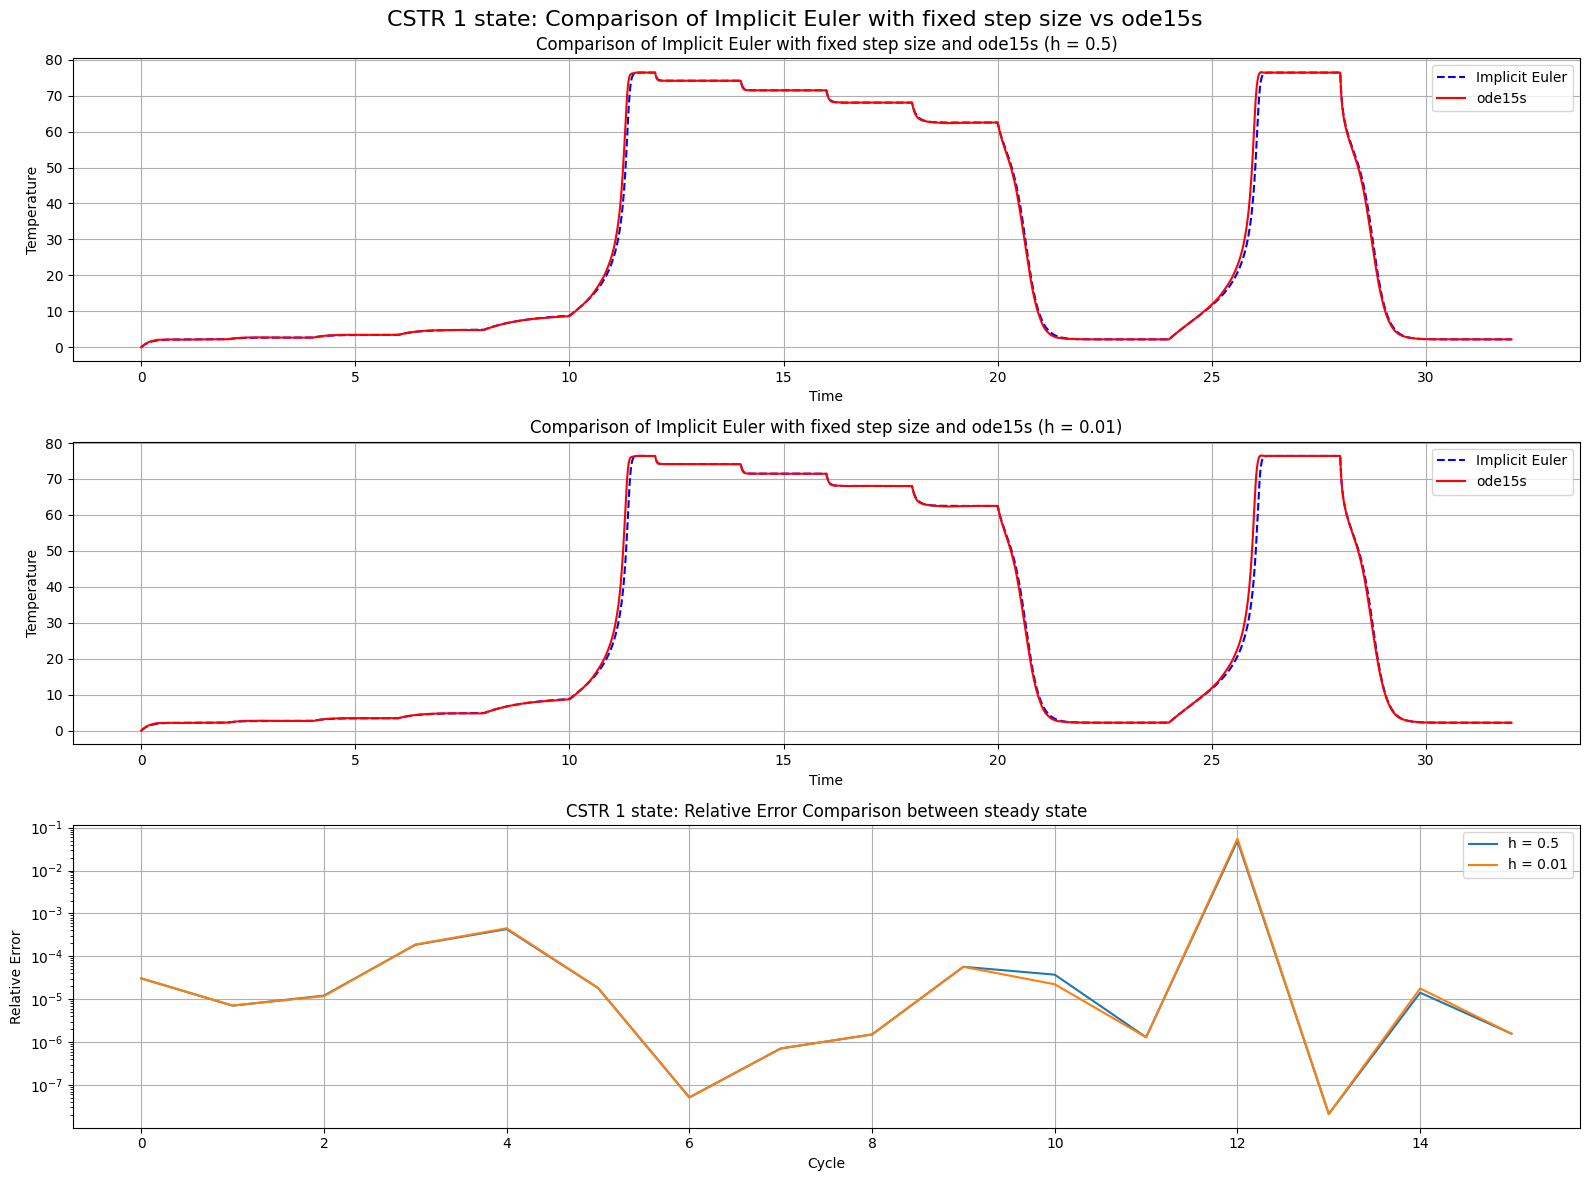

<Figure size 1600x1200 with 0 Axes>

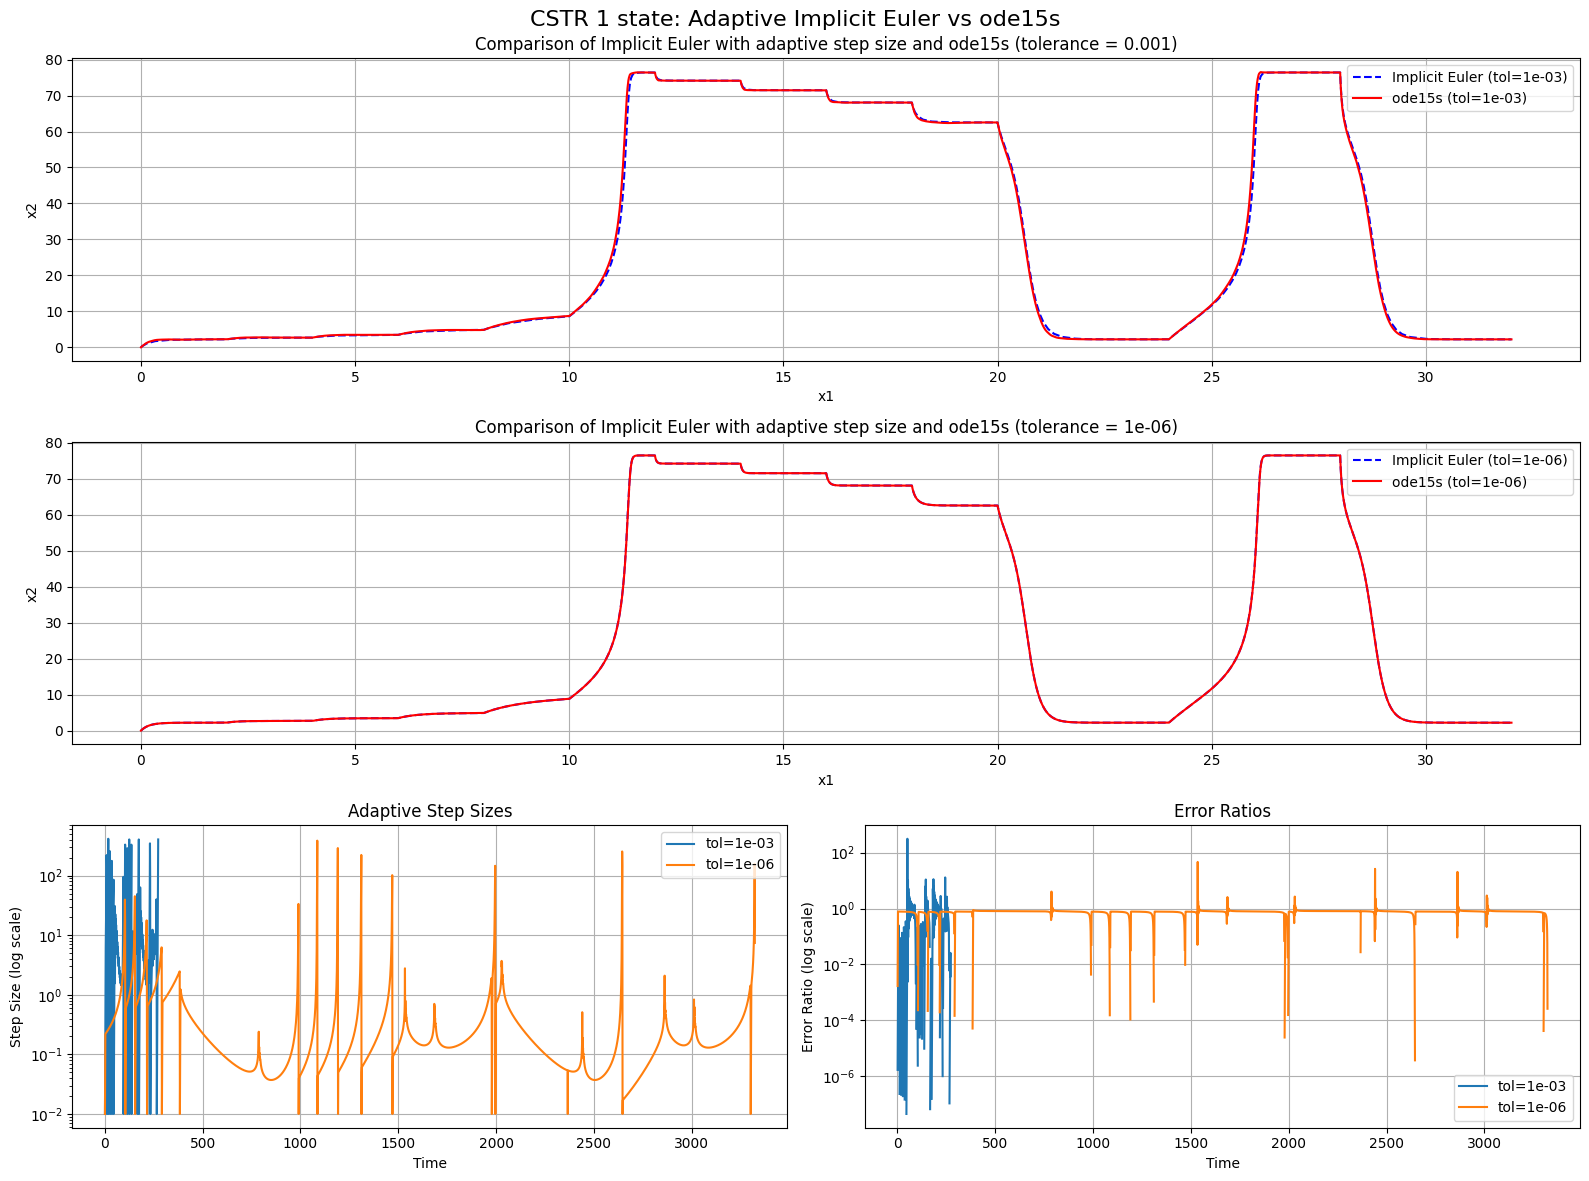

In [4]:
t_span = (0, 120)
cstr_imp_fixed = compare_solvers_cstr(CSTR_1state_model, t_span, model_name = "CSTR 1 state", reference_solver='BDF', reference_solver_name='ode15s',fixed_steps = True, implicit = True, euler = True, fixed_step_sizes=[0.5, 0.01])
cstr_imp_adaptive = compare_solvers_cstr(CSTR_1state_model, t_span, model_name = "CSTR 1 state", steptype = "adaptive",reference_solver='BDF', reference_solver_name='ode15s', adaptive_steps = True, h0 = 0.01, implicit = True, euler = True)

### PFR 3 state

/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/TestProblems.py:364: RuntimeWarning: overflow encountered in power
  dk_dT = k_i * Ea_R / np.power(T[i], 2)
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/TestProblems.py:249: RuntimeWarning: overflow encountered in multiply
  r = k(T) * CA * CB
/Users/katrine/Library/CloudStorage/OneDrive-Personligt/Kandidat/3rdSemester/Scientific Computing/Exam project/CodeandStuff/TestProblems.py:354: RuntimeWarning: overflow encountered in multiply
  r = k(T) * CA * CB


KeyboardInterrupt: 

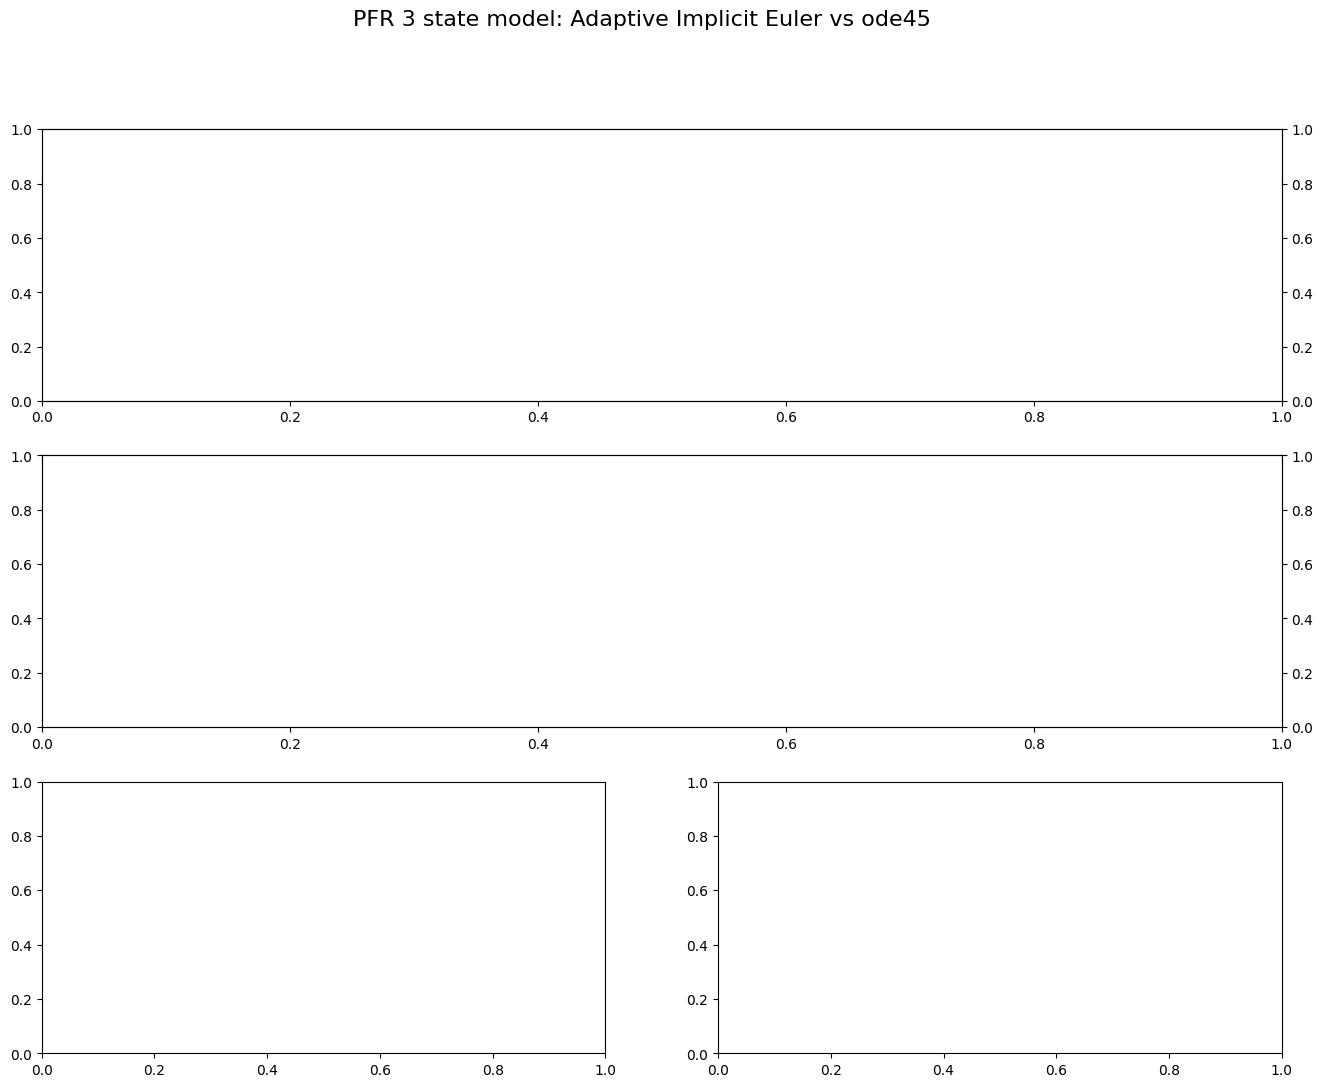

In [6]:
# Initial condition
n = 5  # number of spatial points

Tin = 273.65
CA_in = 1.6 / 2
CB_in = 2.4 / 2
x0 = np.concatenate([
    np.ones(n) * CA_in,    # CA initial
    np.ones(n) * CB_in,    # CB initial
    Tin*np.ones(n)  # T initial
])
t_span = (0, 200)

pfr_imp_adaptive = compare_solvers_pfr(PFR_3state_model, t_span, x0, model_name = "PFR 3 state model", reference_solver_name="ode45", adaptive_steps = True, implicit = True, euler = True, n = n, h0 = 0.001)
pfr_imp_fixed = compare_solvers_pfr(PFR_3state_model, t_span, x0, model_name = "PFR 3 state model", reference_solver_name="ode45", fixed_steps = True, implicit = True, euler = True, n = n, fixed_step_sizes=[0.01, 0.001])

## Summary

In [ ]:
print("Implicit Euler with addaptive steps:")
print("")
print("Van der Pol model (non-stiff, mu = 1), tolerance = 0.001")
print("Accepted steps: ", vp_imp_adaptive_nonstiff[0.001]['n_accept'])
print("Rejected steps: ", vp_imp_adaptive_nonstiff[0.001]['n_reject'])
print("Total number of steps: ", vp_imp_adaptive_nonstiff[0.001]['n_accept'] + vp_imp_adaptive_nonstiff[0.001]['n_reject'])
print("Total number of steps for ode45: ", vp_imp_adaptive_nonstiff[0.001]['ref_nfun'])
print("")
print("Van der Pol model (non-stiff, mu = 1), tolerance = 1e-6")
print("Accepted steps: ", vp_imp_adaptive_nonstiff[1e-6]['n_accept'])
print("Rejected steps: ", vp_imp_adaptive_nonstiff[1e-6]['n_reject'])
print("Total number of steps: ", vp_imp_adaptive_nonstiff[1e-6]['n_accept'] + vp_imp_adaptive_nonstiff[1e-6]['n_reject'])
print("Total number of steps for ode45: ", vp_imp_adaptive_nonstiff[1e-6]['ref_nfun'])
print("")
print("Van der Pol model (stiff, mu = 10), tolerance = 0.001")
print("Accepted steps: ", vp_imp_adaptive_stiff[0.001]['n_accept'])
print("Rejected steps: ", vp_imp_adaptive_stiff[0.001]['n_reject'])
print("Total number of steps: ", vp_imp_adaptive_stiff[0.001]['n_accept'] + vp_imp_adaptive_stiff[0.001]['n_reject'])
print("Total number of steps for ode45: ", vp_imp_adaptive_stiff[0.001]['ref_nfun'])
print("")
print("Van der Pol model (stiff, mu = 10), tolerance = 1e-6")
print("Accepted steps: ", vp_imp_adaptive_stiff[1e-6]['n_accept'])
print("Rejected steps: ", vp_imp_adaptive_stiff[1e-6]['n_reject'])
print("Total number of steps: ", vp_imp_adaptive_stiff[1e-6]['n_accept'] + vp_imp_adaptive_stiff[1e-6]['n_reject'])
print("Total number of steps for ode45: ", vp_imp_adaptive_stiff[1e-6]['ref_nfun'])
print("")
print("CSTR 1 state, tolerance = 0.001")
print("Accepted steps: ", cstr_imp_adaptive[0.001]['n_accept'])
print("Rejected steps: ", cstr_imp_adaptive[0.001]['n_reject'])
print("Total number of steps: ", cstr_imp_adaptive[0.001]['n_accept'] + cstr_imp_adaptive[0.001]['n_reject'])
print("Total number of steps for ode15s: ", cstr_imp_adaptive[0.001]['ref_nfun'])
print("")
print("CSTR 1 state, tolerance = 1e-6")
print("Accepted steps: ", cstr_imp_adaptive[1e-6]['n_accept'])
print("Rejected steps: ", cstr_imp_adaptive[1e-6]['n_reject'])
print("Total number of steps: ", cstr_imp_adaptive[1e-6]['n_accept'] + cstr_imp_adaptive[1e-6]['n_reject'])
print("Total number of steps for ode15s: ", cstr_imp_adaptive[1e-6]['ref_nfun'])

Implicit Euler with addaptive steps:

Van der Pol model (non-stiff, mu = 1), tolerance = 0.001
Accepted steps:  533
Rejected steps:  39
Total number of steps:  572
Total number of steps for ode45:  516

Van der Pol model (non-stiff, mu = 1), tolerance = 1e-6
Accepted steps:  16725
Rejected steps:  1
Total number of steps:  16726
Total number of steps for ode45:  1440

Van der Pol model (stiff, mu = 10), tolerance = 0.001
Accepted steps:  391
Rejected steps:  57
Total number of steps:  448
Total number of steps for ode45:  505

Van der Pol model (stiff, mu = 10), tolerance = 1e-6
Accepted steps:  12194
Rejected steps:  2
Total number of steps:  12196
Total number of steps for ode45:  1441

CSTR 1 state, tolerance = 0.001
Accepted steps:  14
Rejected steps:  0
Total number of steps:  14
Total number of steps for ode15s:  605

CSTR 1 state, tolerance = 1e-6
Accepted steps:  42
Rejected steps:  0
Total number of steps:  42
Total number of steps for ode15s:  2583
